#### Créations des descripteurs de chaque image
1. Pour chaque image passage en gris et equalisation

2. création d'une liste de descripteurs par image ("sift_keyspoints_img") qui sera utilisée pour réaliser les histogrammes par image

3. création d'une liste de descripteurs pour l'ensemble des images ("sift_keyspoints_all_imag") qui sera utilisé pour créer les clusters de descripteurs (on vera çe on détaille  aprés)

In [2]:
from os import getcwd
import pandas as pd
from PIL import Image
import numpy as np 
import matplotlib.pyplot as plt 
import cv2
import sys
sys.path.append("C:\\Users\\User\\WORK\\workspace-ia\\PERSO\\")
from ara_commons import ara_picture_function as ara_pict
from ara_commons.ara_file import get_dir_files
import matplotlib.pyplot as plt

In [3]:
# ---------------------------------------------------------------------------------------------
#                               MAIN
# ---------------------------------------------------------------------------------------------
verbose = False
force_reloading = True

# Récupère le répertoire du programme
file_path = getcwd() + "\\"
file_path

'c:\\Users\\User\\WORK\\workspace-ia\\simplon\\2022-03-Images\\'

In [4]:
img_cloudy_path = file_path + "cloudy10.jpg"
img_zack_path = file_path + "20210925_190551.jpg"

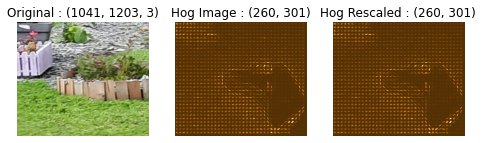

In [5]:
img_zack, resized_img_zack, hog_image_zack = ara_pict.show_hog(img_path=img_zack_path, reduce_ratio=4)

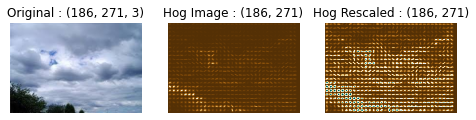

In [6]:
img_cloudy, resized_img_cloudy, hog_image_cloudy = ara_pict.show_hog(img_path=img_cloudy_path)

<div style="display: flex; background-color: green;" >

## TODO
</div>


In [7]:
source_data_path = file_path+"dataset\\"
print("Source path :", source_data_path)

Source path : c:\Users\User\WORK\workspace-ia\simplon\2022-03-Images\dataset\


In [8]:
# récupération données
img_extensions = [".jpg", ".jpeg", ".png"]
images = []

for ext in img_extensions:
    images.extend(get_dir_files(source_data_path, endwith=ext))

print(len(images), "images")

400 images


In [9]:
from collections import defaultdict
import re

## Extract keypoints from each image

In [10]:
img_dic = defaultdict(list)
sift_keyspoints_img=[]
sift_keyspoints_all_img = []

pattern = ara_pict.get_regex_alphabetique_simple()

for img_path in images:
    try:
        img_dic["file_name"].append(img_path)
        name = img_path.lower().split(".")[0]
        name = re.sub(pattern, '', name).strip()
        img_dic["y"].append(name)
        grayimage, keypoint, descriptor = ara_pict.define_img_point(source_data_path+img_path, nb_features=100, display=False, verbose=verbose)
        sift_keyspoints_img.append(descriptor)
        sift_keyspoints_all_img.extend(descriptor)
    except Exception as error:
        print("ERROR : ", img_path)
        print(error)
    

In [11]:
print(len(sift_keyspoints_all_img), len(sift_keyspoints_all_img[0]))

38989 128


In [12]:
df_origin = pd.DataFrame.from_dict(img_dic)
print(df_origin.shape)
df_origin.columns

(400, 2)


Index(['file_name', 'y'], dtype='object')

In [13]:
from sklearn.cluster import MiniBatchKMeans
from sklearn.neural_network import MLPClassifier

# Clustering

We now have an array with a huge number of descriptors. We cannot use all of them to create or model so we need to cluster them. A rule-of-thumb is to create k centers with k = number of categories * 10 (in our case, it's 990).


In [14]:
species = df_origin["y"].sort_values().unique()
species

array(['cloudy', 'rain', 'shine', 'sunrise'], dtype=object)

In [15]:
df_origin["y"].sort_values().nunique()

4

In [16]:
np.size(species)

4

In [17]:
# ou sqrt(len(nbrs_descripteurs))
n_clusters=df_origin["y"].sort_values().nunique() * 100
n_clusters

400

## Création des clusters de descripteurs (je vous laisse creuser un peu)
* Utilisation de MiniBatchKMeans pour obtenir des temps de traitement raisonnables

In [18]:
len(sift_keyspoints_all_img)

38989

In [19]:
batch_size = len(images) * 3
kmeans = MiniBatchKMeans(n_clusters=n_clusters, batch_size=batch_size, verbose=verbose).fit(sift_keyspoints_all_img)

## Creation of the histograms

To create our each image by a histogram. We will create a vector of k value for each image. For each keypoints in an image, we will find the nearest center and increase by one its value.


In [20]:
histo_list = []

for img_path in images:
    try:
        histo = np.zeros(n_clusters)
        grayimage, keypoint, descriptor = ara_pict.define_img_point(source_data_path+img_path, nb_features=100, display=False, verbose=verbose)
        nkp = np.size(keypoint)
        
        for d in descriptor:
            idx = kmeans.predict([d])
            histo[idx] += 1/nkp # Because we need normalized histograms, I prefere to add 1/nkp directly

        histo_list.append(histo)
    except Exception as error:
        print("ERROR : ", img_path)
        print(error)

## Training of the neural network

In [21]:
type(species)

numpy.ndarray

In [22]:
X = np.array(histo_list)
Y = []

# It's a way to convert species name into an integer
for s in df_origin["y"].to_list():
    
    Y.append(np.min(np.nonzero(species == s)))

mlp = MLPClassifier(verbose=verbose, max_iter=600000)
mlp.fit(X, Y)

MLPClassifier(max_iter=600000)

In [23]:
Y

[0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,


In [24]:
mlp.score(X, Y)

1.0

## Predictions

In [23]:
import csv

In [24]:
def predict(img_path, n_clusters, kmeans, mlp):
    _, keypoint, descriptor = ara_pict.define_img_point(img_path, nb_features=100, display=False, verbose=verbose)

    x = np.zeros(n_clusters)
    nkp = np.size(keypoint)

    for d in descriptor:
        idx = kmeans.predict([d])
        x[idx] += 1/nkp
    
    res = mlp.predict_proba([x])
    return res

In [25]:
result_file = open(source_data_path+ "predict2.csv", "w")
result_file_obj = csv.writer(result_file)
result_file_obj.writerow(np.append("id", species))

for img_path in images:
    try:
        res = predict(source_data_path+ img_path, n_clusters, kmeans, mlp)
        row = []
        row.append(img_path)

        for e in res[0]:
            row.append(e)

        result_file_obj.writerow(row)

    except Exception as error:
        print("ERROR : ", img_path)
        print(error)

result_file.close()

In [28]:
source_data_test_path = source_data_path.replace("dataset", "dataset_test")

# récupération données
images_test = []

for ext in img_extensions:
    images_test.extend(get_dir_files(source_data_test_path, endwith=ext))

print(len(images_test), "images")

12 images


In [29]:
images_test

['cloud-002.jpg',
 'cloud-003.jpg',
 'pluie_001.jpg',
 'pluie_003.jpg',
 'pluie_004.jpg',
 'pluie_005.jpg',
 'pluie_006.jpg',
 'pluie_007.jpg',
 'pluie_008.jpg',
 'sunrise-by-the-sea.jpg',
 'cloud-001.jpeg',
 'pluie_002.jpeg']

In [30]:
print("NAME    ", species)
for img_path in images_test:
    res = predict(source_data_test_path+ img_path, n_clusters, kmeans, mlp)
    res2 = res[0]
    cloud = round(res2[0],2)
    rain = round(res2[1],2)
    shine = round(res2[2],2)
    sunrise = round(res2[3],2)
    print(img_path, cloud, rain,shine, sunrise)

NAME     ['cloudy' 'rain' 'shine' 'sunrise']
cloud-002.jpg 0.5 0.05 0.16 0.29
cloud-003.jpg 0.92 0.04 0.03 0.0
pluie_001.jpg 0.01 0.58 0.0 0.41
pluie_003.jpg 0.0 0.9 0.06 0.04
pluie_004.jpg 0.0 1.0 0.0 0.0
pluie_005.jpg 0.0 0.99 0.01 0.0
pluie_006.jpg 0.0 0.33 0.67 0.0
pluie_007.jpg 0.0 0.93 0.07 0.0
pluie_008.jpg 0.0 0.01 0.09 0.9
sunrise-by-the-sea.jpg 0.0 0.0 0.17 0.83
cloud-001.jpeg 0.29 0.0 0.35 0.36
pluie_002.jpeg 0.0 1.0 0.0 0.0


## Création des features des images (je vous laisse creuser un peu)
Features d'une image = Histogramme d'une image = Comptage pour une image du nombre de descripteurs par cluster

<div style="display: flex; background-color: Blue; padding: 15px;" >

## ANNEXES 
</div>

In [ ]:
from skimage.io import imread
from skimage.transform import resize

(1041, 1203, 3)


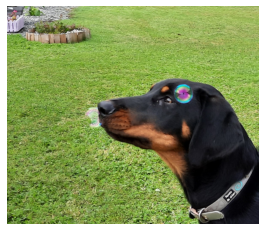

In [4]:
img = imread(img_zack_path)
plt.axis("off")
plt.imshow(img)
plt.show()
print(img.shape)

(260, 301, 3)


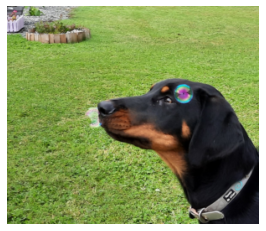

In [6]:
# resizing image
resized_img = resize(img, (img.shape[0]/4, img.shape[1]/4))
plt.axis("off")
plt.imshow(resized_img)
print(resized_img.shape)

C:\Users\User\AppData\Local\Temp\ipykernel_20320\3498511264.py:2: FutureWarning: `multichannel` is a deprecated argument name for `hog`. It will be removed in version 1.0. Please use `channel_axis` instead.
  fd, hog_image = hog(resized_img, orientations=9, pixels_per_cell=(8, 8),


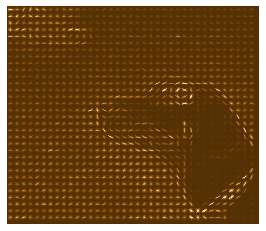

In [10]:
#creating hog features
fd, hog_image = ara_pict.hog(resized_img, orientations=9, pixels_per_cell=(8, 8),
                	cells_per_block=(2, 2), visualize=True, multichannel=True)
plt.axis("off")
plt.imshow(hog_image, cmap="BrBG")
# 'Accent', 'Accent_r', 'Blues', 'Blues_r', 'BrBG', 'BrBG_r', 'BuGn', 'BuGn_r', 'BuPu', 'BuPu_r', 'CMRmap', 'CMRmap_r', 'Dark2', 'Dark2_r', 'GnBu', 'GnBu_r', 'Greens', 'Greens_r', 'Greys', 'Greys_r', 'OrRd', 'OrRd_r', 'Oranges', 'Oranges_r', 'PRGn', 'PRGn_r', 'Paired', 'Paired_r', 'Pastel1', 'Pastel1_r', 'Pastel2', 'Pastel2_r', 'PiYG', 'PiYG_r', 'PuBu', 'PuBuGn', 'PuBuGn_r', 'PuBu_r', 'PuOr', 'PuOr_r', 'PuRd', 'PuRd_r', 'Purples', 'Purples_r', 'RdBu', 'RdBu_r', 'RdGy', 'RdGy_r', 'RdPu', 'RdPu_r', 'RdYlBu', 'RdYlBu_r', 'RdYlGn', 'RdYlGn_r', 'Reds', 'Reds_r', 'Set1', 'Set1_r', 'Set2', 'Set2_r', 'Set3', 'Set3_r', 'Spectral', 'Spectral_r', 'Wistia', 'Wistia_r', 'YlGn', 'YlGnBu', 'YlGnBu_r', 'YlGn_r', 'YlOrBr', 'YlOrBr_r', 'YlOrRd', 'YlOrRd_r', 'afmhot', 'afmhot_r', 'autumn', 'autumn_r', 'binary', 'binary_r', 'bone', 'bone_r', 'brg', 'brg_r', 'bwr', 'bwr_r', 'cividis', 'cividis_r', 'cool', 'cool_r', 'coolwarm', 'coolwarm_r', 'copper', 'copper_r', 'cubehelix', 'cubehelix_r', 'flag', 'flag_r', 'gist_earth', 'gist_earth_r', 'gist_gray', 'gist_gray_r', 'gist_heat', 'gist_heat_r', 'gist_ncar', 'gist_ncar_r', 'gist_rainbow', 'gist_rainbow_r', 'gist_stern', 'gist_stern_r', 'gist_yarg', 'gist_yarg_r', 'gnuplot', 'gnuplot2', 'gnuplot2_r', 'gnuplot_r', 'gray', 'gray_r', 'hot', 'hot_r', 'hsv', 'hsv_r', 'inferno', 'inferno_r', 'jet', 'jet_r', 'magma', 'magma_r', 'nipy_spectral', 'nipy_spectral_r', 'ocean', 'ocean_r', 'pink', 'pink_r', 'plasma', 'plasma_r', 'prism', 'prism_r', 'rainbow', 'rainbow_r', 'seismic', 'seismic_r', 'spring', 'spring_r', 'summer', 'summer_r', 'tab10', 'tab10_r', 'tab20', 'tab20_r', 'tab20b', 'tab20b_r', 'tab20c', 'tab20c_r', 'terrain', 'terrain_r', 'turbo', 'turbo_r', 'twilight', 'twilight_r', 'twilight_shifted', 'twilight_shifted_r', 'viridis', 'viridis_r', 'winter', 'winter_r'

In [7]:
hog = cv2.HOGDescriptor()
im = cv2.imread(img_zack_path)
h = hog.compute(im)

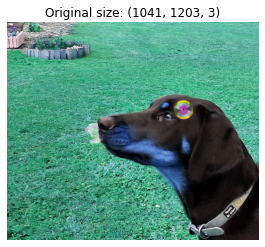

In [10]:
plt.imshow(im)
plt.title(f'Original size: {im.shape}') 
plt.axis('off')
plt.show()

# plt.imshow(h)
# plt.title(f'HoG size: {h.shape}') 
# plt.axis('off')
# plt.show()

In [9]:
# cv2.imshow('Original', im)
cv2.imshow('HoG', h)
cv2.waitKey(0)
cv2.destroyAllWindows()

In [ ]:
result_file = open(source_data_path+ "predict.csv", "w")
result_file_obj = csv.writer(result_file)
result_file_obj.writerow(np.append("id", species))


for img_path in images:
    try:
        img = cv2.imread(source_data_path+ img_path)
        grayimage, keypoint, descriptor = ara_pict.define_img_point(source_data_path+img_path, nb_features=100, display=False, verbose=verbose)

        x = np.zeros(n_clusters)
        nkp = np.size(keypoint)

        for d in descriptor:
            idx = kmeans.predict([d])
            x[idx] += 1/nkp
        
        res = mlp.predict_proba([x])
        row = []
        row.append(img_path)

        for e in res[0]:
            row.append(e)

        result_file_obj.writerow(row)

    except Exception as error:
        print("ERROR : ", img_path)
        print(error)

result_file.close()